In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [113]:
df1 = pd.read_csv('STRAWBERRY_ACIDITY_ENV_20221212.csv') #산도
df2 = pd.read_csv('STRAWBERRY_FRUIT_WIDTH_ENV_20221209.csv') #과폭
df3 = pd.read_csv('STRAWBERRY_PRODUCTION_ENV_20221209.csv') #출하량
df4 = pd.read_csv('STRAWBERRY_FLOWER_NUM_ENV_20221209.csv') #개화수
df5 = pd.read_csv('STRAWBERRY_FRUIT_QUANTITY_INFO_ENV_20221209.csv') #착과비율, 과중과폭비

In [114]:
df6 = pd.read_csv('STRAWBERRY_THECA_DIAMETER_ENV_20221209.csv') #관부직경
df7 = pd.read_csv('STRAWBERRY_LEAF_LEN_ENV_20221203.csv')#엽장
# df8 = pd.read_csv('STRAWBERRY_ROOTING_SEASON_ENV_20221203.csv')
df9 = pd.read_csv('STRAWBERRY_FRUIT_WEIGHT_ENV_20221209.csv') #과중
df10 = pd.read_csv('STRAWBERRY_FLOWERLESS_NUM_ENV_20221210.csv') #미개화수

In [115]:
# df11 = pd.read_csv('STRAWBERRY_ONLINE_SALES_20221212.csv')
df12 = pd.read_csv('STRAWBERRY_SUGAR_CONTENT_ENV_20221209.csv') #당도
df13 = pd.read_csv('STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv') #착과수
df14 = pd.read_csv('STRAWBERRY_SOIL_SURFACE_LEN_ENV_20221202.csv') #초장
# df15 = pd.read_csv('STRAWBERRY_FLOWERING_SEASON_ENV_20221207.csv') 

In [116]:
df16 = pd.read_csv('STRAWBERRY_FRUIT_LEN_ENV_20221209.csv') #과장
df17 = pd.read_csv('STRAWBERRY_FRUIT_QUALITY_INFO_ENV_20221209.csv') #당도산도비
df18 = pd.read_csv('STRAWBERRY_LEAF_INFO_ENV_20221209.csv') #엽장엽폭비, 누적엽수, 엽수증가속도, 맨앞 열 제거
# df19 = pd.read_csv('STRAWBERRY_AXILLARY_BUD_ENV_20221207.csv')
df20 = pd.read_csv('STRAWBERRY_GROWTH_LENGTH_ENV_20221209.csv') #생장길이

In [117]:
df21 = pd.read_csv('STRAWBERRY_ROOT_NUM_ENV_20221209.csv') #화방꽃수
df22 = pd.read_csv('STRAWBERRY_LEAF_WIDTH_ENV_20221209.csv') #엽폭
df23 = pd.read_csv('STRAWBERRY_PETIOLE_LEN_ENV_20221209.csv') #엽병장
df24 = pd.read_csv('STRAWBERRY_LEAF_NUM_ENV_20221209.csv') #엽수
df25 = pd.read_csv('STRAWBERRY_STEM_INFO_ENV_20221209.csv') #생장속도

In [118]:
pd.set_option('display.max_columns', 500)

In [119]:
select_col = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1',\
       'HTNG_TPRT_1', 'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',\
       'SKLT_OPDR_RATE_1_RIGHT','STRG_DT','PH_LVL','GDD']
other_cols = [col for col in dataframes[0].columns if col not in select_col]


In [120]:
import pandas as pd

# 데이터프레임 생성 (다섯 개의 데이터프레임을 리스트에 저장)
dataframes = [df1, df2, df3, df4, df5, df6, df7, df9, df10, df12, df13, df14, df16, df17, df18, df20, df21, df22, df23, df24, df25]

# 임계치 온도 설정 (보통 10°C 사용)
threshold_temp = 7

# 각 데이터프레임에 대해 반복
for i, df in enumerate(dataframes):
    # 날짜 열을 datetime 형식으로 변환
    df['STRG_DT'] = pd.to_datetime(df['STRG_DT'])

    # 날짜별 GDD를 저장할 리스트 초기화
    daily_gdd_list = []

    # 데이터를 날짜로 그룹화하고 각 그룹에 대한 일별 GDD 계산
    for date, group in df.groupby(df['STRG_DT'].dt.date):
        t_min = group['AVE_INNER_TPRT_1_2'].min()
        t_max = group['AVE_INNER_TPRT_1_2'].max()

        # T_min이 T_base보다 작으면 T_min을 T_base로 설정
        t_min = max(t_min, threshold_temp)

        daily_gdd = (t_max - t_min) / 2 - threshold_temp
        daily_gdd_list.append({'Date': date, 'GDD': daily_gdd})

    # 결과를 데이터프레임으로 변환
    gdd_df = pd.DataFrame(daily_gdd_list)

    # 날짜 열을 datetime 형식으로 변환
    gdd_df['Date'] = pd.to_datetime(gdd_df['Date'])
    df_copy = df.copy()

    # 두 데이터프레임을 날짜를 기준으로 병합하여 GDD 값을 추가
    merged_df = pd.merge(df_copy, gdd_df, left_on=df_copy['STRG_DT'].dt.date, right_on=gdd_df['Date'].dt.date, how='inner')

    # 중복된 열 제거
    merged_df = merged_df.drop(columns=['key_0', 'Date'])

    # 결과 데이터프레임을 원래 데이터프레임 변수에 할당
    dataframes[i] = merged_df



In [121]:
df_1 = dataframes[0].drop(columns = other_cols)
df_2 = dataframes[1].drop(columns = other_cols)
df_3 = dataframes[2].drop(columns = other_cols)
df_4 = dataframes[3].drop(columns = other_cols)
df_5 = dataframes[4].drop(columns = other_cols)
df_6 = dataframes[5].drop(columns = other_cols)
df_7 = dataframes[6].drop(columns = other_cols)
df_8 = dataframes[7].drop(columns = other_cols)
df_9 = dataframes[8].drop(columns = other_cols)
df_10 = dataframes[9].drop(columns = other_cols)
df_11 = dataframes[10].drop(columns = other_cols)
df_12 = dataframes[11].drop(columns = other_cols)
df_13 = dataframes[12].drop(columns = other_cols)
df_14 = dataframes[13].drop(columns = other_cols)
df_15 = dataframes[14].drop(columns = other_cols)
df_16 = dataframes[15].drop(columns = other_cols)
df_17 = dataframes[16].drop(columns = other_cols)
df_18 = dataframes[17].drop(columns = other_cols)
df_19 = dataframes[18].drop(columns = other_cols)
df_20 = dataframes[19].drop(columns = other_cols)
df_21 = dataframes[20].drop(columns = other_cols)
df_15 = df_15.drop(columns = 'Unnamed: 0')

In [122]:
df_1

,STRG_DT,PH_LVL,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD
0,2022-01-01 00:00:00,0.62,359,36.5,13.0,36.0,84.4,0,-1.35
1,2022-01-01 00:10:00,0.62,360,36.3,13.0,36.1,86.3,0,-1.35
2,2022-01-01 00:20:00,0.62,361,36.0,13.0,36.1,87.3,0,-1.35
3,2022-01-01 00:30:00,0.62,363,35.7,13.0,36.1,86.2,0,-1.35
4,2022-01-01 00:40:00,0.62,366,35.6,13.0,35.6,88.1,0,-1.35
...,...,...,...,...,...,...,...,...,...
26054,2022-06-30 23:10:00,0.73,315,33.2,5.0,31.1,100.0,100,12.45
26055,2022-06-30 23:20:00,0.73,313,33.0,5.0,31.0,100.0,100,12.45
26056,2022-06-30 23:30:00,0.73,316,32.8,5.0,30.8,100.0,100,12.45
26057,2022-06-30 23:40:00,0.73,315,32.7,5.0,30.7,100.0,100,12.45


[[ 0.41096904 -2.50829202  0.2461019   2.0708524  -0.30361078 -0.21878677
  -0.139375  ]]
[[ 0.07077104  0.41053953  0.27593037 -0.2918688   0.31410949  0.05866039
  -0.10928687]]
FRST_RATE


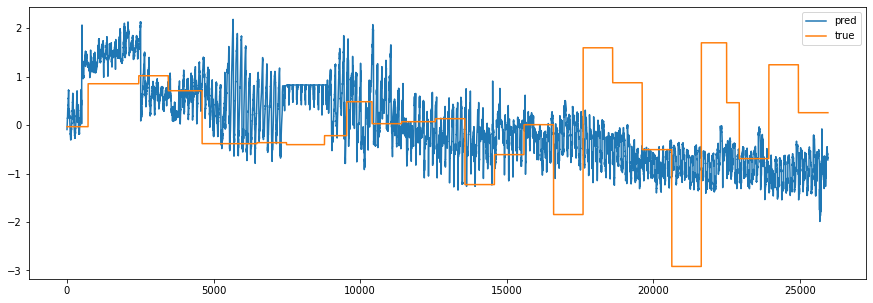

FRT_WT_WDTH_RATE


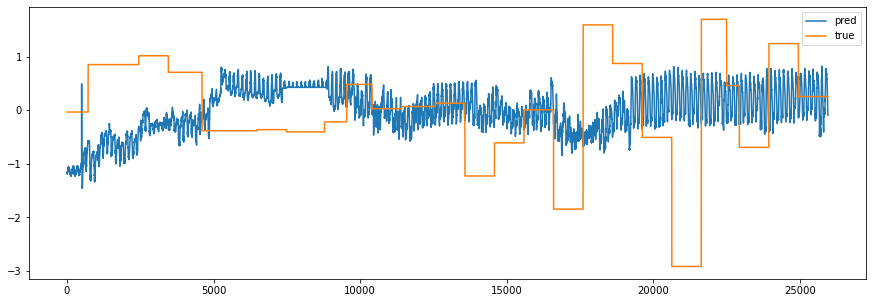

In [150]:
# 다중선형회귀 모델 생성 및 적합
model_1 = LinearRegression()
model_2 = LinearRegression()
X = df_5.iloc[:,3:]
y_1 = df_5.iloc[:,1]
y_2 = df_5.iloc[:,2]

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y_1 = StandardScaler()
y_1 = scaler_y_1.fit_transform(y_1.values.reshape(-1,1))
scaler_y_2 = StandardScaler()
y_2 = scaler_y_2.fit_transform(y_2.values.reshape(-1,1))

model_1.fit(X, y_1)
model_2.fit(X, y_2)

y_pred_1 = model_1.predict(X)
y_pred_2 = model_2.predict(X)
print(model_1.coef_)
print(model_2.coef_)

print(df_5.columns[1])
plt.figure(figsize=(15,5))
plt.plot(np.array(y_pred_1),label = "pred")
plt.plot(np.array(y),label = "true")
plt.legend()
plt.show()
print(df_5.columns[2])
plt.figure(figsize=(15,5))
plt.plot(np.array(y_pred_2),label = "pred")
plt.plot(np.array(y),label = "true")
plt.legend()
plt.show()

생육변수 FRST_RATE


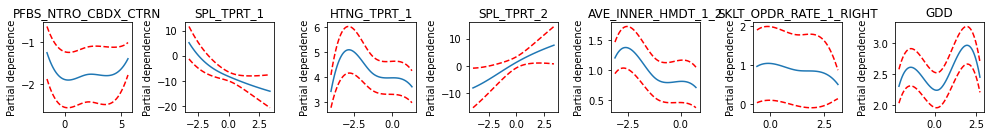

FRST_RATE


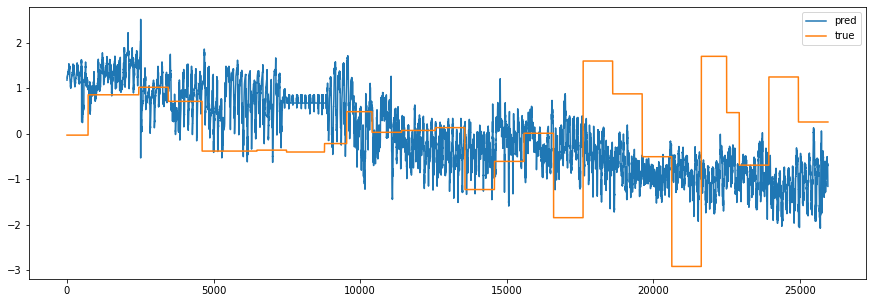

생육변수 FRT_WT_WDTH_RATE


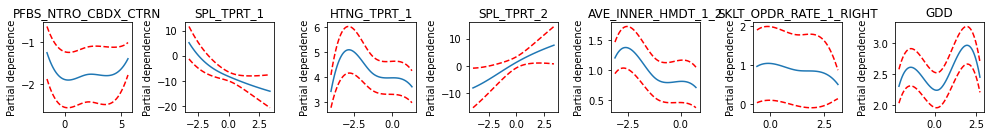

FRT_WT_WDTH_RATE


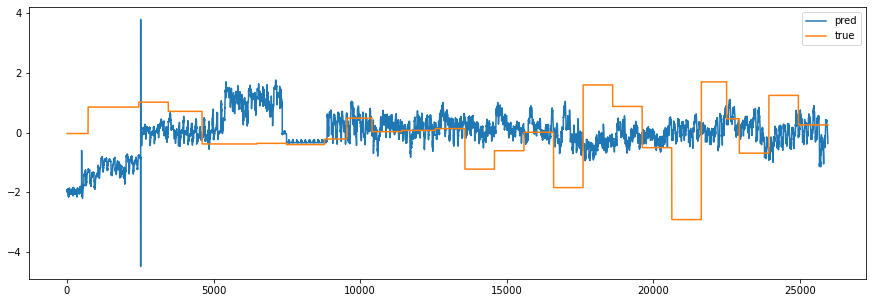

In [158]:
# 결과를 저장할 리스트 초기화
results = []


X = df_5.iloc[:, 3:]  # 독립 변수는 2번 열부터 끝까지
y_1 = df_5.iloc[:, 1] 
y_2 = df_5.iloc[:, 2]

    # 데이터 정규화
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y_1 = StandardScaler()
y_1 = scaler_y_1.fit_transform(y_1.values.reshape(-1, 1))
scaler_y_2 = StandardScaler()
y_2 = scaler_y_2.fit_transform(y_2.values.reshape(-1, 1))


    # 다중 선형 회귀 모델 생성 및 피팅
gam_1 = LinearGAM(n_splines=5, lam = 0.018589456953499162).fit(X, y_1)
gam_2 = LinearGAM(n_splines=5, lam = 0.018589456953499162).fit(X, y_2)

    
    # 예측
y_pred_1 = gam_1.predict(X)
y_pred_2 = gam_2.predict(X)

    # 결과 저장
results.append((df_5.columns[1], y_pred_1, y, df_5.columns[2], y_pred_2))
    
print("생육변수", df_5.columns[1])
fig, axs = plt.subplots(1, 7, figsize=(14, 2)) 

    # 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                    'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD']

for i, ax in enumerate(axs.ravel()): 
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylabel('Partial dependence')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정

plt.tight_layout()
plt.show()

# 결과 출력 및 시각화
for result in results:
    print(result[0])
    # 시각화
    plt.figure(figsize=(15, 5))
    plt.plot(np.array(result[1]), label="pred")
    plt.plot(np.array(result[2]), label="true")
    plt.legend()
    plt.show()

    
print("생육변수", df_5.columns[2])
fig, axs = plt.subplots(1, 7, figsize=(14, 2)) 

    # 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                    'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD']

for i, ax in enumerate(axs.ravel()): 
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylabel('Partial dependence')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정

plt.tight_layout()
plt.show()

# 결과 출력 및 시각화
for result in results:
    print(result[3])
    # 시각화
    plt.figure(figsize=(15, 5))
    plt.plot(np.array(result[4]), label="pred")
    plt.plot(np.array(result[2]), label="true")
    plt.legend()
    plt.show()


[[-0.09620037  0.04807478 -0.07349561 -0.16760709 -0.27248952  0.04748054
   0.24462407]]
LEAF_LNGTH_LEAF_WDTH_RATE


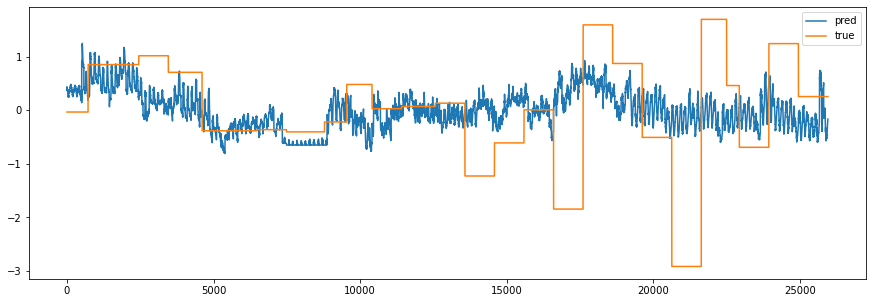

ACCMLT_LEAF_CNT
[[-0.40778778 -0.34474109 -0.12385894  0.72551218  0.41593941  0.24160422
   0.19257257]]


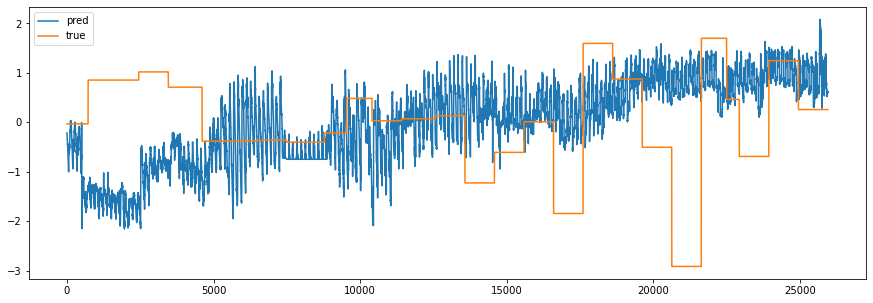

LEAF_CNT_INCR_SPD
[[ 0.13459949 -0.03098158 -0.07886018  0.06265963 -0.16631155 -0.0745102
  -0.26301727]]


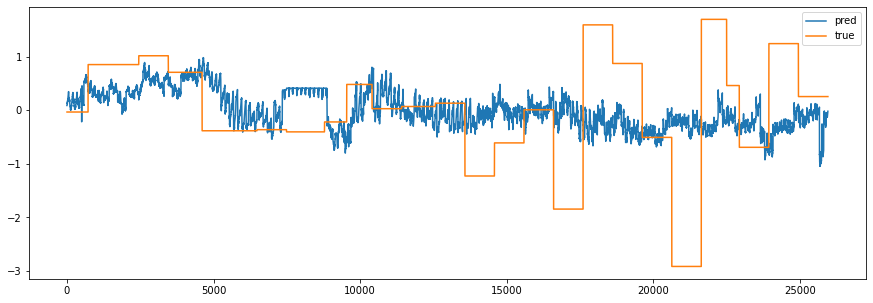

In [154]:
# 다중선형회귀 모델 생성 및 적합
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()
X = df_15.iloc[:,4:]
y_1 = df_15.iloc[:,1]
y_2 = df_15.iloc[:,2]
y_3 = df_15.iloc[:,3]

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y_1 = StandardScaler()
y_1 = scaler_y_1.fit_transform(y_1.values.reshape(-1,1))
scaler_y_2 = StandardScaler()
y_2 = scaler_y_2.fit_transform(y_2.values.reshape(-1,1))
scaler_y_3 = StandardScaler()
y_3 = scaler_y_3.fit_transform(y_3.values.reshape(-1,1))


model_1.fit(X, y_1)
model_2.fit(X, y_2)
model_3.fit(X, y_3)

y_pred_1 = model_1.predict(X)
y_pred_2 = model_2.predict(X)
y_pred_3 = model_3.predict(X)
print(model_1.coef_)



print(df_15.columns[1])
plt.figure(figsize=(15,5))
plt.plot(np.array(y_pred_1),label = "pred")
plt.plot(np.array(y),label = "true")
plt.legend()
plt.show()
print(df_15.columns[2])
print(model_2.coef_)
plt.figure(figsize=(15,5))
plt.plot(np.array(y_pred_2),label = "pred")
plt.plot(np.array(y),label = "true")
plt.legend()
plt.show()
print(df_15.columns[3])
print(model_3.coef_)
plt.figure(figsize=(15,5))
plt.plot(np.array(y_pred_3),label = "pred")
plt.plot(np.array(y),label = "true")
plt.legend()
plt.show()

생육변수 LEAF_LNGTH_LEAF_WDTH_RATE


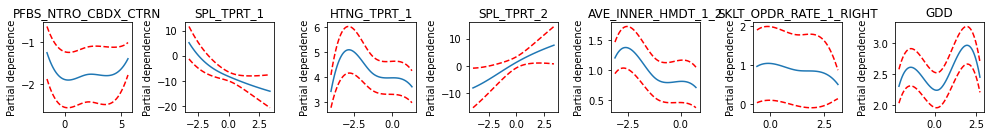

LEAF_LNGTH_LEAF_WDTH_RATE


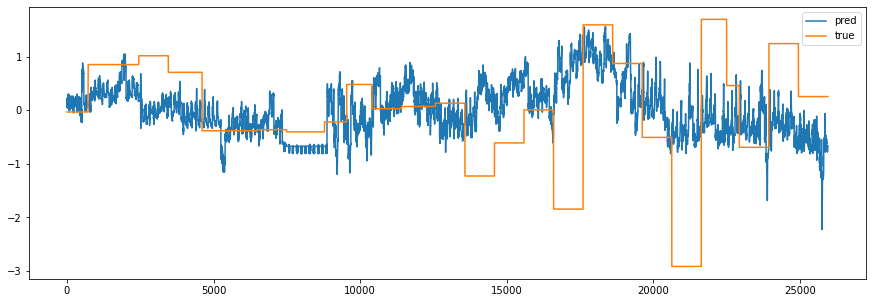

생육변수 ACCMLT_LEAF_CNT


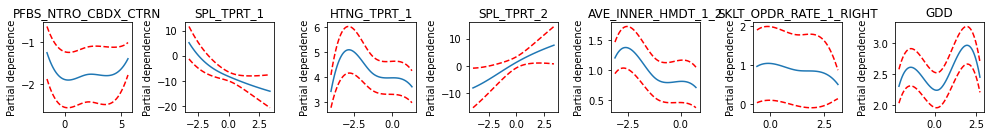

ACCMLT_LEAF_CNT


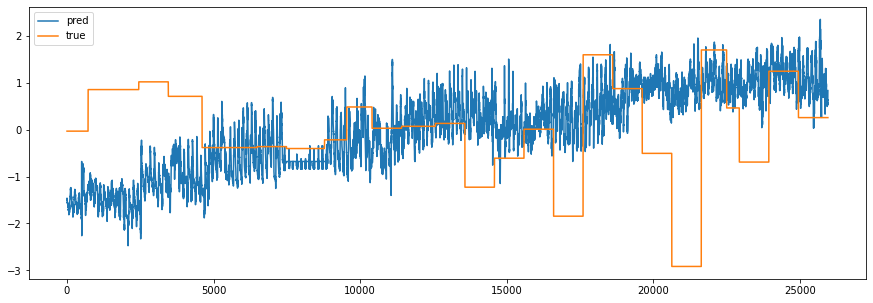

생육변수 LEAF_CNT_INCR_SPD


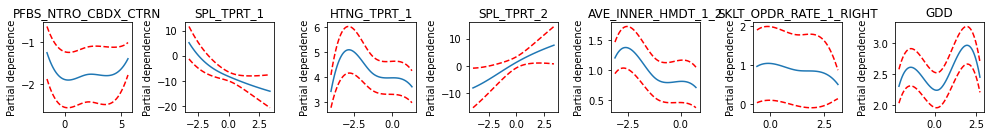

LEAF_CNT_INCR_SPD


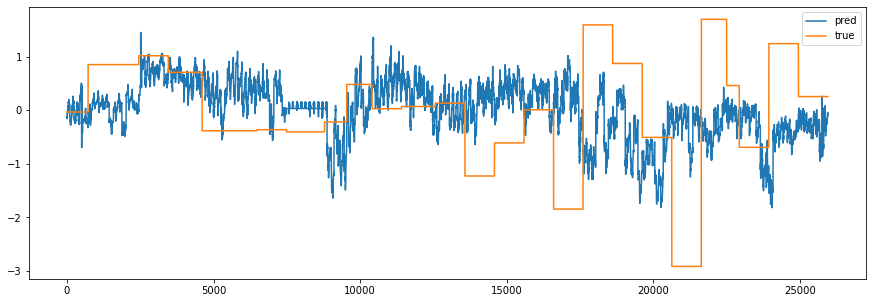

In [159]:
# 결과를 저장할 리스트 초기화
results = []


X = df_15.iloc[:, 4:]  # 독립 변수는 2번 열부터 끝까지
y_1 = df_15.iloc[:, 1] 
y_2 = df_15.iloc[:, 2]
y_3 = df_15.iloc[:, 3]

    # 데이터 정규화
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y_1 = StandardScaler()
y_1 = scaler_y_1.fit_transform(y_1.values.reshape(-1, 1))
scaler_y_2 = StandardScaler()
y_2 = scaler_y_2.fit_transform(y_2.values.reshape(-1, 1))
scaler_y_3 = StandardScaler()
y_3 = scaler_y_3.fit_transform(y_3.values.reshape(-1, 1))


    # 다중 선형 회귀 모델 생성 및 피팅
gam_1 = LinearGAM(n_splines=5, lam = 0.018589456953499162).fit(X, y_1)
gam_2 = LinearGAM(n_splines=5, lam = 0.018589456953499162).fit(X, y_2)
gam_3 = LinearGAM(n_splines=5, lam = 0.018589456953499162).fit(X, y_3)

    
    # 예측
y_pred_1 = gam_1.predict(X)
y_pred_2 = gam_2.predict(X)
y_pred_3 = gam_3.predict(X)

    # 결과 저장
results.append((df_15.columns[1], y_pred_1, y, df_15.columns[2], y_pred_2, df_15.columns[3], y_pred_3))
    
print("생육변수", df_15.columns[1])
fig, axs = plt.subplots(1, 7, figsize=(14, 2)) 

    # 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                    'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD']

for i, ax in enumerate(axs.ravel()): 
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylabel('Partial dependence')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정

plt.tight_layout()
plt.show()

# 결과 출력 및 시각화
for result in results:
    print(result[0])
    # 시각화
    plt.figure(figsize=(15, 5))
    plt.plot(np.array(result[1]), label="pred")
    plt.plot(np.array(result[2]), label="true")
    plt.legend()
    plt.show()

    
print("생육변수", df_15.columns[2])
fig, axs = plt.subplots(1, 7, figsize=(14, 2)) 

    # 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                    'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD']

for i, ax in enumerate(axs.ravel()): 
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylabel('Partial dependence')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정

plt.tight_layout()
plt.show()

# 결과 출력 및 시각화
for result in results:
    print(result[3])
    # 시각화
    plt.figure(figsize=(15, 5))
    plt.plot(np.array(result[4]), label="pred")
    plt.plot(np.array(result[2]), label="true")
    plt.legend()
    plt.show()


print("생육변수", df_15.columns[3])
fig, axs = plt.subplots(1, 7, figsize=(14, 2)) 

    # 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                    'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD']

for i, ax in enumerate(axs.ravel()): 
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylabel('Partial dependence')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정

plt.tight_layout()
plt.show()


# 결과 출력 및 시각화
for result in results:
    print(result[5])
    # 시각화
    plt.figure(figsize=(15, 5))
    plt.plot(np.array(result[6]), label="pred")
    plt.plot(np.array(result[2]), label="true")
    plt.legend()
    plt.show()


In [165]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# df_1부터 df_21까지의 데이터프레임을 저장할 리스트 초기화
dataframes = [df_1, df_2, df_3, df_4, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14,  df_16, df_17, df_18, df_19, df_20, df_21]

# 결과를 저장할 리스트 초기화
results = []

# 각 데이터프레임에 대해 반복 작업 수행
for i, df in enumerate(dataframes, start=1):
    # 독립 변수 (X)와 종속 변수 (y) 설정
    X = df.iloc[:, 2:]  # 독립 변수는 2번 열부터 끝까지
    y = df.iloc[:, 1]   # 종속 변수는 1번 열

    # 데이터 정규화
    scaler_x = StandardScaler()
    X = scaler_x.fit_transform(X)
    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y.values.reshape(-1, 1))

    # 다중 선형 회귀 모델 생성 및 피팅
    model = LinearRegression()
    model.fit(X, y)

    # 예측
    y_pred = model.predict(X)

    # 결과 저장
    results.append((df.columns[1], model.coef_, y_pred, y))

# 결과 출력 및 시각화
for result in results:
    print(result[0])
    print("회귀 계수 (Coefficients):", result[1])

    # 시각화
#     plt.figure(figsize=(15, 5))
#     plt.plot(np.array(result[2]), label="pred")
#     plt.plot(np.array(result[3]), label="true")
#     plt.legend()
#     plt.show()


PH_LVL
회귀 계수 (Coefficients): [[-0.08296707  0.0926584  -0.0554375  -0.1113867  -0.14929213 -0.24790294
   0.08276624]]
FRT_WDTH
회귀 계수 (Coefficients): [[ 0.13915717  0.01713165  0.04641112 -0.27837435  0.09478765  0.56995535
  -0.01376069]]
SHPMN_QTY
회귀 계수 (Coefficients): [[-0.00241296 -0.94938493 -0.00497711  1.00801612  0.28732496  0.04003993
   0.04893553]]
BLMNG_CNT
회귀 계수 (Coefficients): [[-0.1540754  -0.50688167  0.15625946  0.17858099  0.14642657  0.42246497
   0.24862237]]
CRN_DIAM
회귀 계수 (Coefficients): [[-0.09310905 -0.49880155  0.20699766  0.19148271  0.24685215  0.497729
   0.24207288]]
LEAF_LNGTH
회귀 계수 (Coefficients): [[ 0.04775255  0.26811951 -0.06157021 -0.04753055  0.47512692  0.11121702
   0.35642762]]
FRT_WT
회귀 계수 (Coefficients): [[-0.05687736 -0.07109421  0.01748986 -0.2859986  -0.11023063  0.32579844
   0.06425489]]
NOT_BLMNG_CNT
회귀 계수 (Coefficients): [[-0.13295379  1.21615213 -0.08502537 -1.10173575  0.0847306   0.05800658
   0.06178557]]
SGCN
회귀 계수 (Coefficients): [[

생육변수 PH_LVL


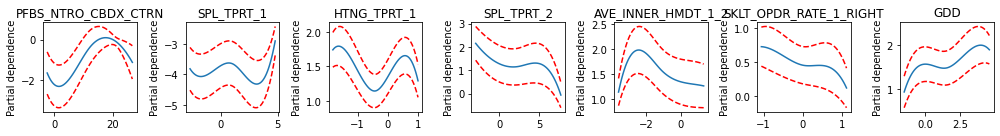

생육변수 FRT_WDTH


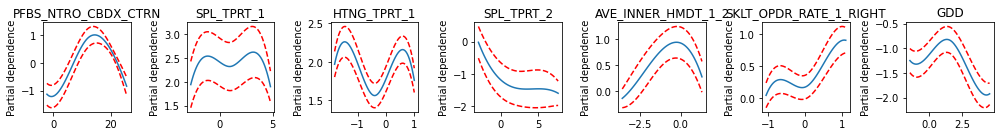

생육변수 SHPMN_QTY


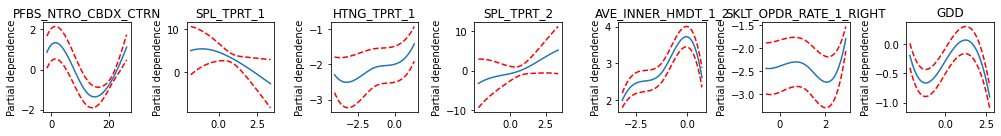

생육변수 BLMNG_CNT


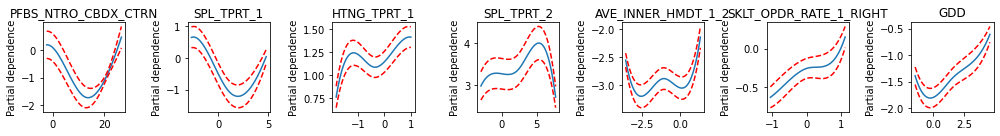

생육변수 CRN_DIAM


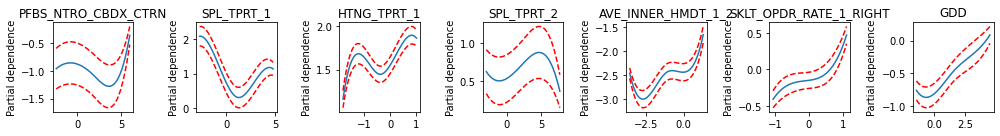

생육변수 LEAF_LNGTH


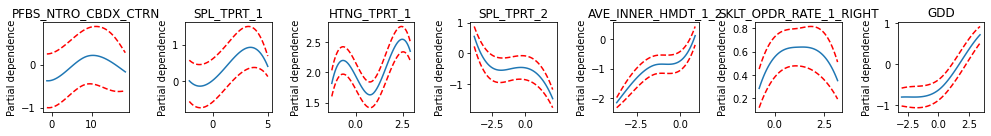

생육변수 FRT_WT


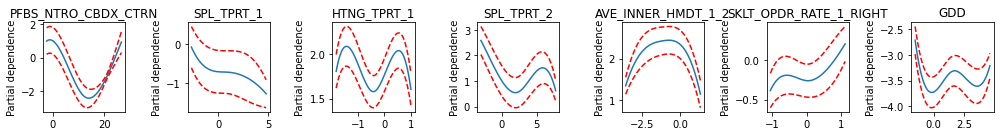

생육변수 NOT_BLMNG_CNT


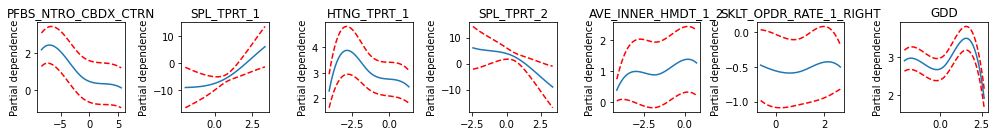

생육변수 SGCN


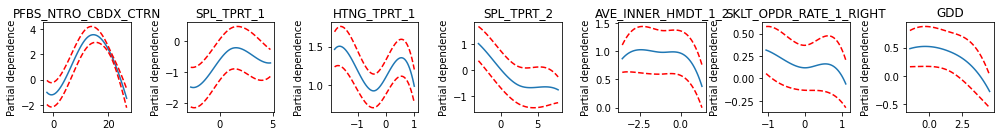

생육변수 FRST_TREE_CNT


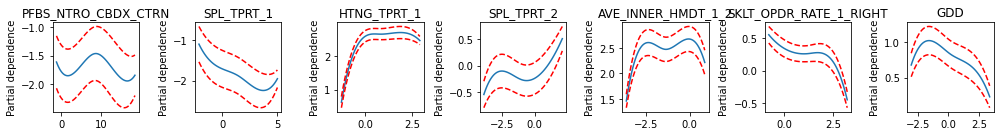

생육변수 PLT_LNGTH


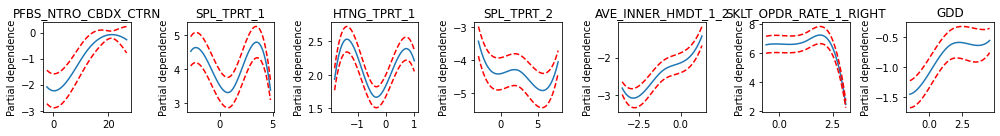

생육변수 FRT_LNGTH


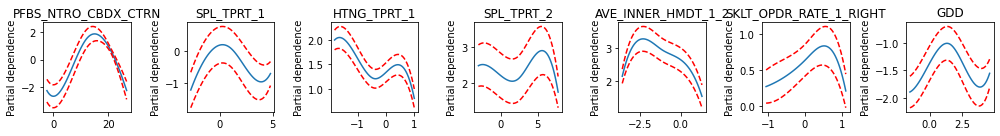

생육변수 SGCN_PH_RATE


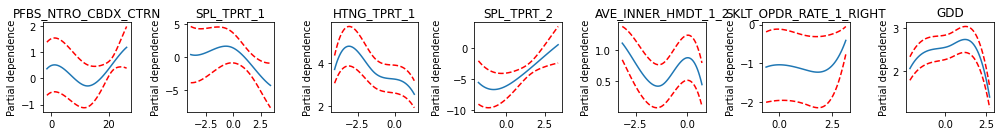

생육변수 GRTH_LNGTH


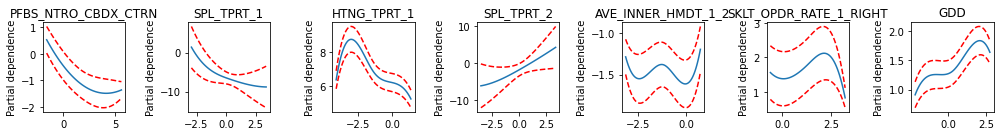

생육변수 FLWRCLSTR_FLWR_NBR


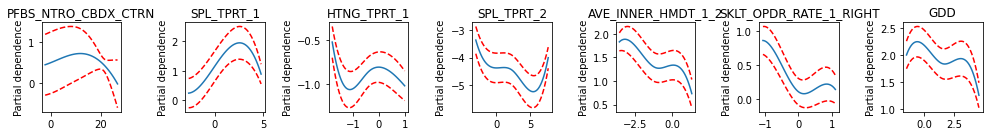

생육변수 LEAF_WDTH


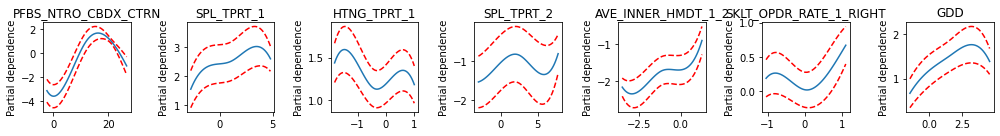

생육변수 PTL_LNGTH


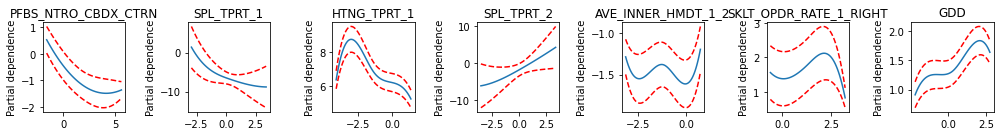

생육변수 LEAF_CNT


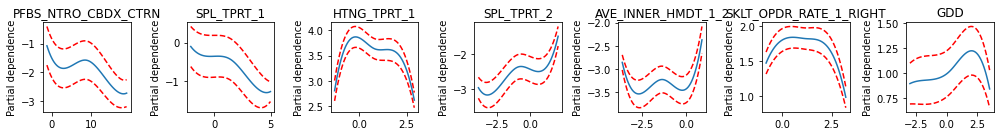

생육변수 GRTH_SPD


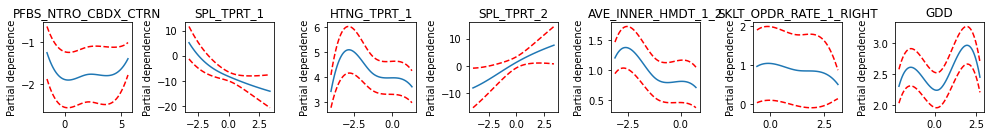

PH_LVL


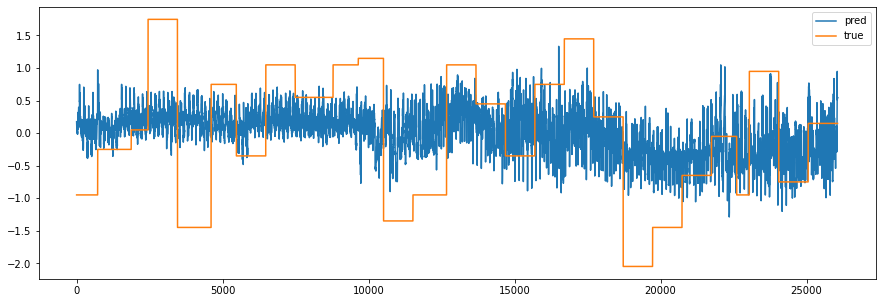

FRT_WDTH


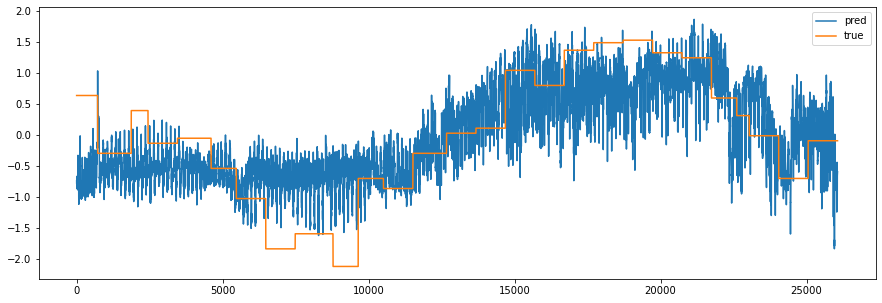

SHPMN_QTY


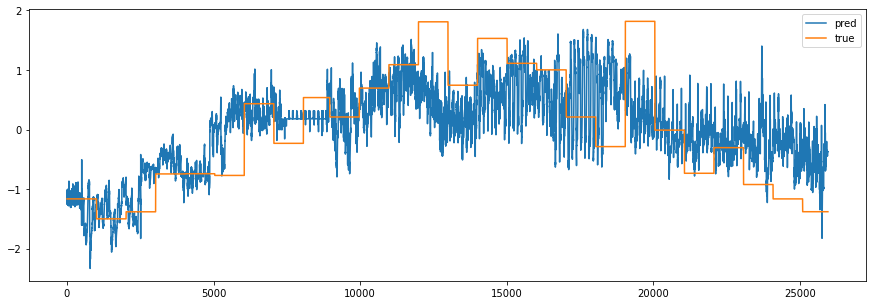

BLMNG_CNT


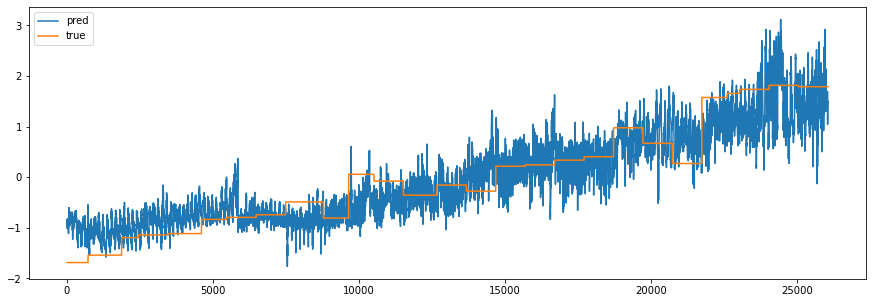

CRN_DIAM


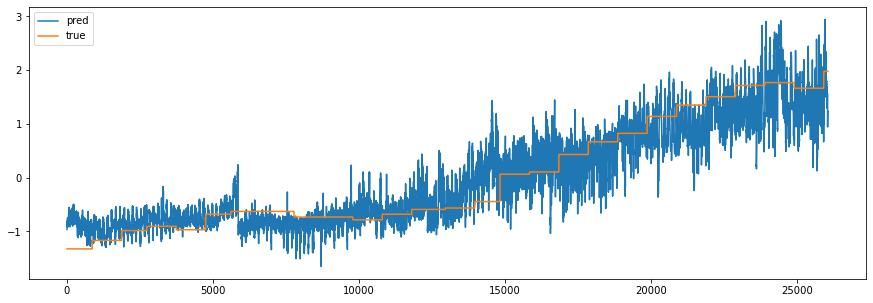

LEAF_LNGTH


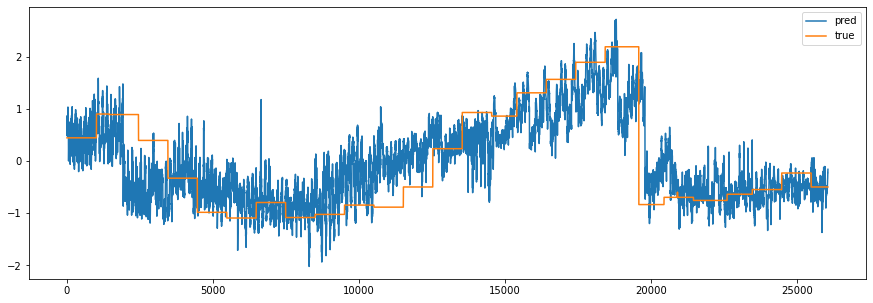

FRT_WT


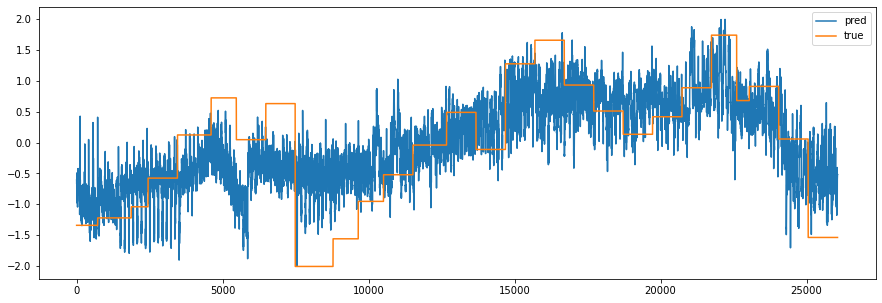

NOT_BLMNG_CNT


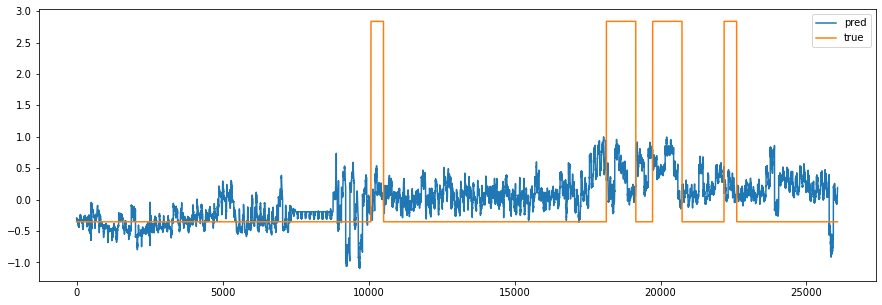

SGCN


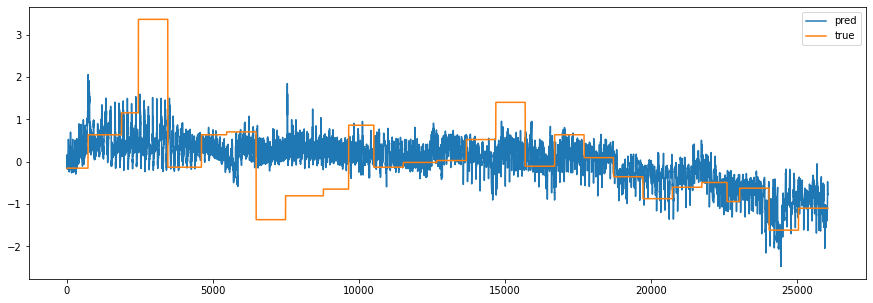

FRST_TREE_CNT


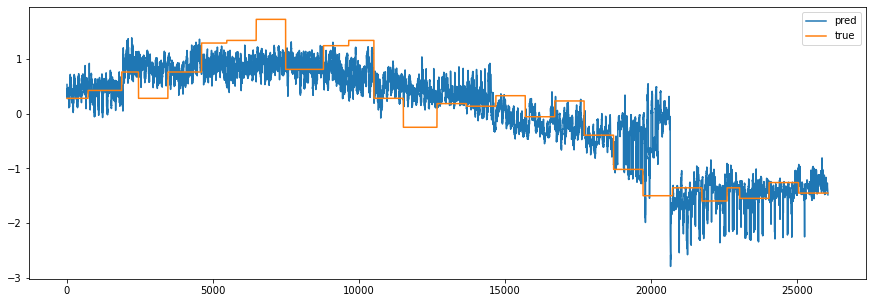

PLT_LNGTH


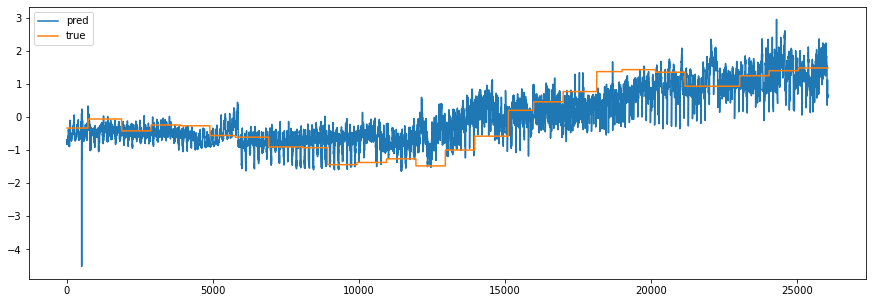

FRT_LNGTH


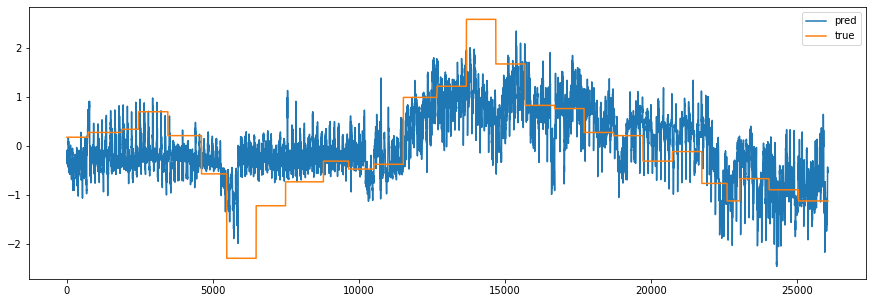

SGCN_PH_RATE


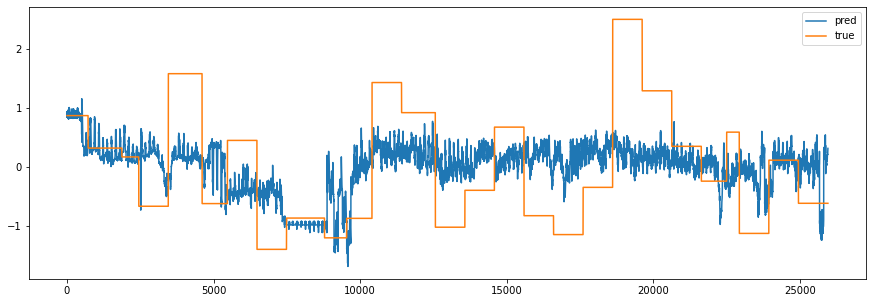

GRTH_LNGTH


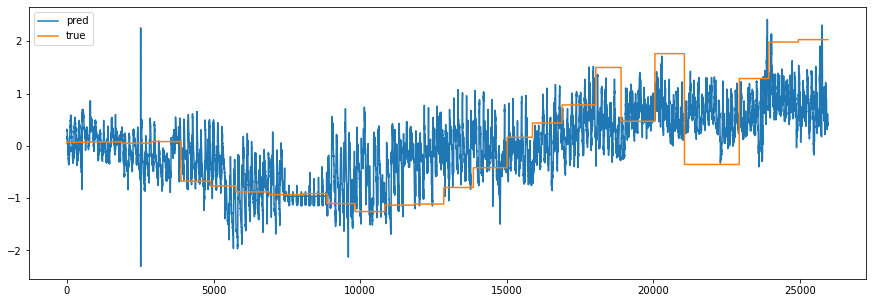

FLWRCLSTR_FLWR_NBR


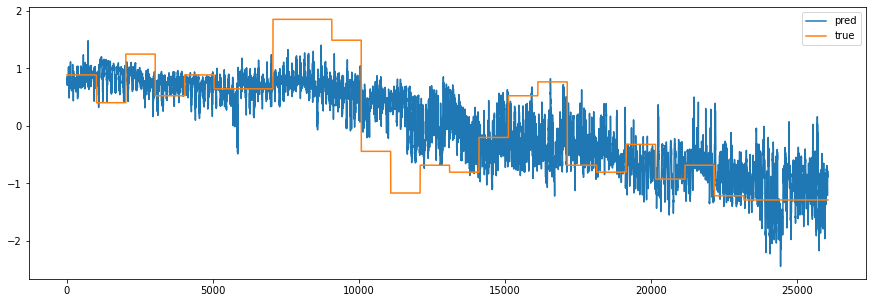

LEAF_WDTH


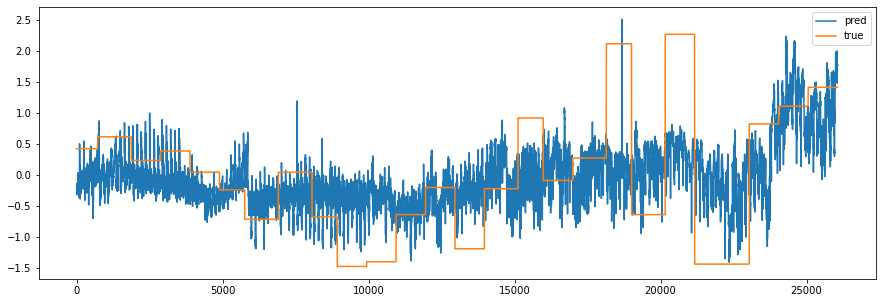

PTL_LNGTH


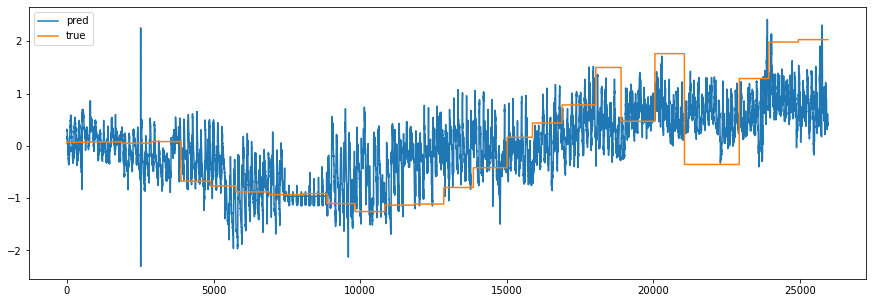

LEAF_CNT


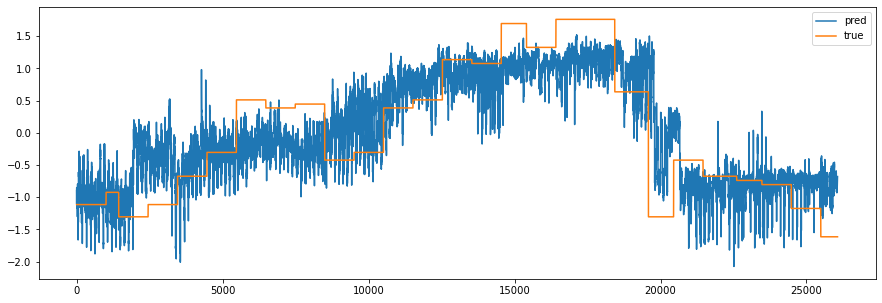

GRTH_SPD


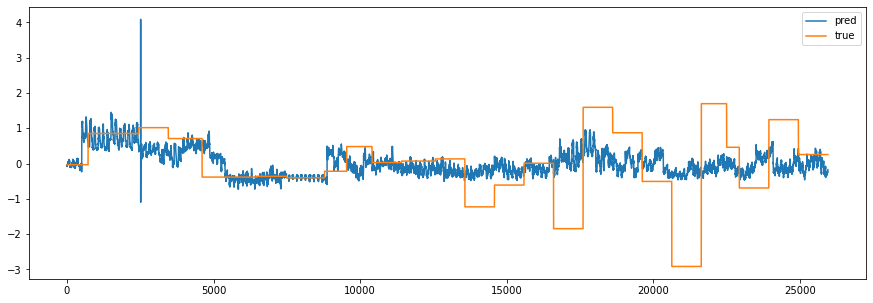

In [164]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f, l

# df_1부터 df_21까지의 데이터프레임을 저장할 리스트 초기화
dataframes = [df_1, df_2, df_3, df_4, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14,  df_16, df_17, df_18, df_19, df_20, df_21]

# 결과를 저장할 리스트 초기화
results = []

# 각 데이터프레임에 대해 반복 작업 수행
for i, df in enumerate(dataframes, start=1):
    # 독립 변수 (X)와 종속 변수 (y) 설정
    X = df.iloc[:, 2:]  # 독립 변수는 2번 열부터 끝까지
    y = df.iloc[:, 1]   # 종속 변수는 1번 열

    # 데이터 정규화
    scaler_x = StandardScaler()
    X = scaler_x.fit_transform(X)
    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y.values.reshape(-1, 1))

    # 다중 선형 회귀 모델 생성 및 피팅
    gam = LinearGAM(n_splines=5, lam = 0.018589456953499162).fit(X, y)

    
    # 예측
    y_pred = gam.predict(X)

    # 결과 저장
    results.append((df.columns[1], y_pred, y))
    
    print("생육변수", df.columns[1])
    fig, axs = plt.subplots(1, 7, figsize=(14, 2)) 

    # 각 서브플롯에 원하는 타이틀 설정
    feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                     'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD']

    for i, ax in enumerate(axs.ravel()): 
        XX = gam.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.set_ylabel('Partial dependence')
        ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정

    plt.tight_layout()
    plt.show()
    plt.savefig(f'df_{i}_partial_dependence.png')

# 이미지 파일 저장 후 그래프 닫기
    plt.close()
    

# 결과 출력 및 시각화
for result in results:
    print(result[0])
    # 시각화
    plt.figure(figsize=(15, 5))
    plt.plot(np.array(result[1]), label="pred")
    plt.plot(np.array(result[2]), label="true")
    plt.legend()
    plt.show()
